In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsforecast.models import SeasonalExponentialSmoothing, ADIDA, ARIMA
from statsforecast import StatsForecast


In [147]:
def load_data(pathfile):
    df = pd.read_csv(pathfile)
    df_ISPU = df[['tanggal', 'stasiun', 'pm10', 'so2', 'co', 'o3', 'no2','categori']]
    # Assuming 'df' is your original DataFrame

    # First, convert 'tanggal' to datetime
    df_ISPU['tanggal'] = pd.to_datetime(df['tanggal'])

    # Then, convert the columns to numeric, replacing invalid values with NaN
    df_ISPU['pm10'] = pd.to_numeric(df['pm10'], errors='coerce')
    df_ISPU['so2'] = pd.to_numeric(df['so2'], errors='coerce')
    df_ISPU['co'] = pd.to_numeric(df['co'], errors='coerce')
    df_ISPU['o3'] = pd.to_numeric(df['o3'], errors='coerce')
    df_ISPU['no2'] = pd.to_numeric(df['no2'], errors='coerce')
    
    
    #select where categori is SEDANG, BAIK, TIDAK SEHAT, SANGAT TIDAK SEHAT, BERBAHAYA

    df_ISPU = df_ISPU[df_ISPU['categori'].isin(['SEDANG', 'BAIK', 'TIDAK SEHAT', 'SANGAT TIDAK SEHAT', 'BERBAHAYA'])]

    print(df_ISPU.head())

    #rename SANGAT TIDAK SEHAT and BERBAHAYA to TIDAK SEHAT

    df_ISPU['categori'] = df_ISPU['categori'].replace(['SANGAT TIDAK SEHAT', 'BERBAHAYA'], 'TIDAK SEHAT')
    return df_ISPU

In [148]:
filepath='/Users/rianrachmanto/pypro/project/Jakarta-Air-Quality-Prediction/data/raw/merged_data.csv'
df_ispu=load_data(filepath)

     tanggal             stasiun  pm10  so2    co    o3   no2 categori
0 2010-01-01  DKI1 (Bunderan HI)  60.0  4.0  73.0  27.0  14.0   SEDANG
1 2010-01-02  DKI1 (Bunderan HI)  32.0  2.0  16.0  33.0   9.0     BAIK
2 2010-01-03  DKI1 (Bunderan HI)  27.0  2.0  19.0  20.0   9.0     BAIK
3 2010-01-04  DKI1 (Bunderan HI)  22.0  2.0  16.0  15.0   6.0     BAIK
4 2010-01-05  DKI1 (Bunderan HI)  25.0  2.0  17.0  15.0   8.0     BAIK


/var/folders/r_/0zt7_hb10179rdt5t_5rl9t80000gn/T/ipykernel_1617/2974486447.py:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_ISPU['tanggal'] = pd.to_datetime(df['tanggal'])
/var/folders/r_/0zt7_hb10179rdt5t_5rl9t80000gn/T/ipykernel_1617/2974486447.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ISPU['tanggal'] = pd.to_datetime(df['tanggal'])
/var/folders/r_/0zt7_hb10179rdt5t_5rl9t80000gn/T/ipykernel_1617/2974486447.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [149]:
def data_checking(df_ispu):
    print(df_ispu.shape)
    print(df_ispu.info())
    print(df_ispu.describe())
    print(df_ispu.isnull().sum())
    
    #plot boxplot
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.boxplot(data=df_ispu, x='pm10', ax=axes[0])
    sns.boxplot(data=df_ispu, x='so2', ax=axes[0])
    sns.boxplot(data=df_ispu, x='co', ax=axes[1])
    sns.boxplot(data=df_ispu, x='o3', ax=axes[0])
    sns.boxplot(data=df_ispu, x='no2', ax=axes[1])
    plt.show()

    return df_ispu

(18105, 8)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18105 entries, 0 to 21521
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   18105 non-null  datetime64[ns]
 1   stasiun   18034 non-null  object        
 2   pm10      17352 non-null  float64       
 3   so2       17569 non-null  float64       
 4   co        17744 non-null  float64       
 5   o3        17512 non-null  float64       
 6   no2       17615 non-null  float64       
 7   categori  18105 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 1.2+ MB
None
               pm10           so2            co            o3           no2
count  17352.000000  17569.000000  17744.000000  17512.000000  17615.000000
mean      52.736111     17.839604     21.641625     65.080973     12.780698
std       19.443753     12.454466     13.930844     37.248320     10.846974
min        2.000000      0.000000      0.

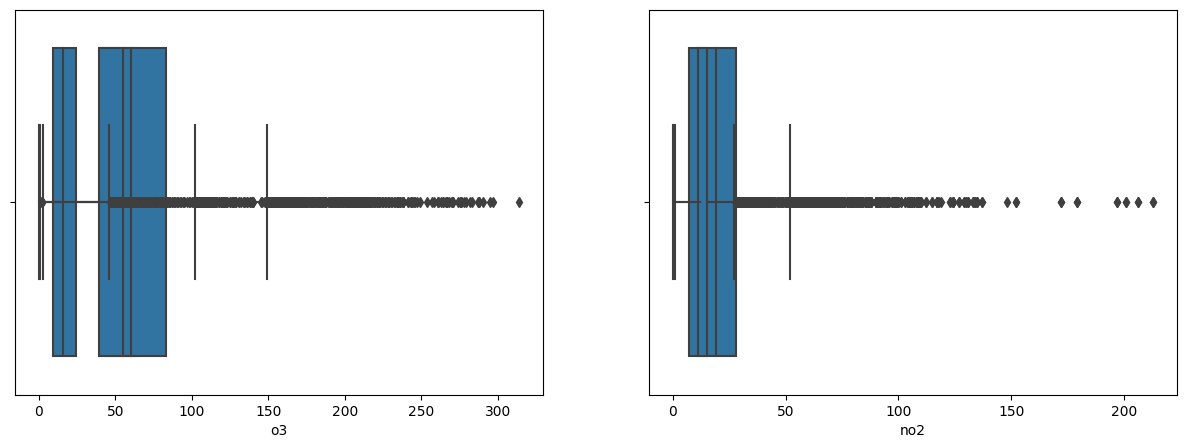

,tanggal,stasiun,pm10,so2,co,o3,no2,categori
0,2010-01-01,DKI1 (Bunderan HI),60.0,4.0,73.0,27.0,14.0,SEDANG
1,2010-01-02,DKI1 (Bunderan HI),32.0,2.0,16.0,33.0,9.0,BAIK
2,2010-01-03,DKI1 (Bunderan HI),27.0,2.0,19.0,20.0,9.0,BAIK
3,2010-01-04,DKI1 (Bunderan HI),22.0,2.0,16.0,15.0,6.0,BAIK
4,2010-01-05,DKI1 (Bunderan HI),25.0,2.0,17.0,15.0,8.0,BAIK
...,...,...,...,...,...,...,...,...
21517,2021-11-26,DKI5 (Kebon Jeruk) Jakarta Barat,32.0,16.0,7.0,15.0,20.0,SEDANG
21518,2021-11-27,DKI5 (Kebon Jeruk) Jakarta Barat,22.0,13.0,7.0,18.0,22.0,BAIK
21519,2021-11-28,DKI5 (Kebon Jeruk) Jakarta Barat,18.0,12.0,2.0,16.0,8.0,BAIK
21520,2021-11-29,DKI5 (Kebon Jeruk) Jakarta Barat,15.0,13.0,3.0,13.0,9.0,BAIK


In [150]:
data_checking(df_ispu)

In [151]:
#import simpleimputer
from sklearn.impute import SimpleImputer
#import forest isolation
from sklearn.ensemble import IsolationForest

def eda(df_ispu):
    #fill mising values of stasiun with "unknown"
    df_ispu['stasiun'].fillna('unknown', inplace=True)
    

    #impute all numerical columns with mean
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp_mean.fit(df_ispu[['pm10', 'so2', 'co', 'o3', 'no2']])
    df_ispu[['pm10', 'so2', 'co', 'o3', 'no2']] = imp_mean.transform(df_ispu[['pm10', 'so2', 'co', 'o3', 'no2']])

    #remove outliers usong isolation forest
    clf = IsolationForest(random_state=0).fit(df_ispu[['pm10', 'so2', 'co', 'o3', 'no2']])
    df_ispu['outlier'] = clf.predict(df_ispu[['pm10', 'so2', 'co', 'o3', 'no2']])
    df_ispu = df_ispu[df_ispu['outlier'] != -1]
    df_ispu.drop('outlier', axis=1, inplace=True)

    

    print(df_ispu.isnull().sum())

    return df_ispu

In [152]:
eda(df_ispu)

tanggal     0
stasiun     0
pm10        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64


/var/folders/r_/0zt7_hb10179rdt5t_5rl9t80000gn/T/ipykernel_1617/511407704.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ispu.drop('outlier', axis=1, inplace=True)


,tanggal,stasiun,pm10,so2,co,o3,no2,categori
1,2010-01-02,DKI1 (Bunderan HI),32.0,2.0,16.0,33.0,9.0,BAIK
2,2010-01-03,DKI1 (Bunderan HI),27.0,2.0,19.0,20.0,9.0,BAIK
3,2010-01-04,DKI1 (Bunderan HI),22.0,2.0,16.0,15.0,6.0,BAIK
4,2010-01-05,DKI1 (Bunderan HI),25.0,2.0,17.0,15.0,8.0,BAIK
5,2010-01-06,DKI1 (Bunderan HI),30.0,3.0,22.0,19.0,11.0,BAIK
...,...,...,...,...,...,...,...,...
21517,2021-11-26,DKI5 (Kebon Jeruk) Jakarta Barat,32.0,16.0,7.0,15.0,20.0,SEDANG
21518,2021-11-27,DKI5 (Kebon Jeruk) Jakarta Barat,22.0,13.0,7.0,18.0,22.0,BAIK
21519,2021-11-28,DKI5 (Kebon Jeruk) Jakarta Barat,18.0,12.0,2.0,16.0,8.0,BAIK
21520,2021-11-29,DKI5 (Kebon Jeruk) Jakarta Barat,15.0,13.0,3.0,13.0,9.0,BAIK


In [153]:
def featuring(df_ispu):
    # group by date and aggregate by mean
    df_grouped = df_ispu.groupby('tanggal')[['pm10', 'so2', 'co', 'o3', 'no2']].mean().reset_index()
    print(df_grouped.head())

    #plot time series for all features into 5 subplots
    fig, axes = plt.subplots(5, 1, figsize=(15, 15))
    axes[0].plot(df_grouped['tanggal'], df_grouped['pm10'])
    axes[0].set_title('pm10')
    axes[1].plot(df_grouped['tanggal'], df_grouped['so2'])
    axes[1].set_title('so2')
    axes[2].plot(df_grouped['tanggal'], df_grouped['co'])
    axes[2].set_title('co')
    axes[3].plot(df_grouped['tanggal'], df_grouped['o3'])
    axes[3].set_title('o3')
    axes[4].plot(df_grouped['tanggal'], df_grouped['no2'])
    axes[4].set_title('no2')
    plt.tight_layout()
    plt.show()
    return df_grouped





     tanggal  pm10  so2    co    o3   no2
0 2010-01-01  60.0  4.0  73.0  27.0  14.0
1 2010-01-02  32.0  2.0  16.0  33.0   9.0
2 2010-01-03  27.0  2.0  19.0  20.0   9.0
3 2010-01-04  22.0  2.0  16.0  15.0   6.0
4 2010-01-05  25.0  2.0  17.0  15.0   8.0


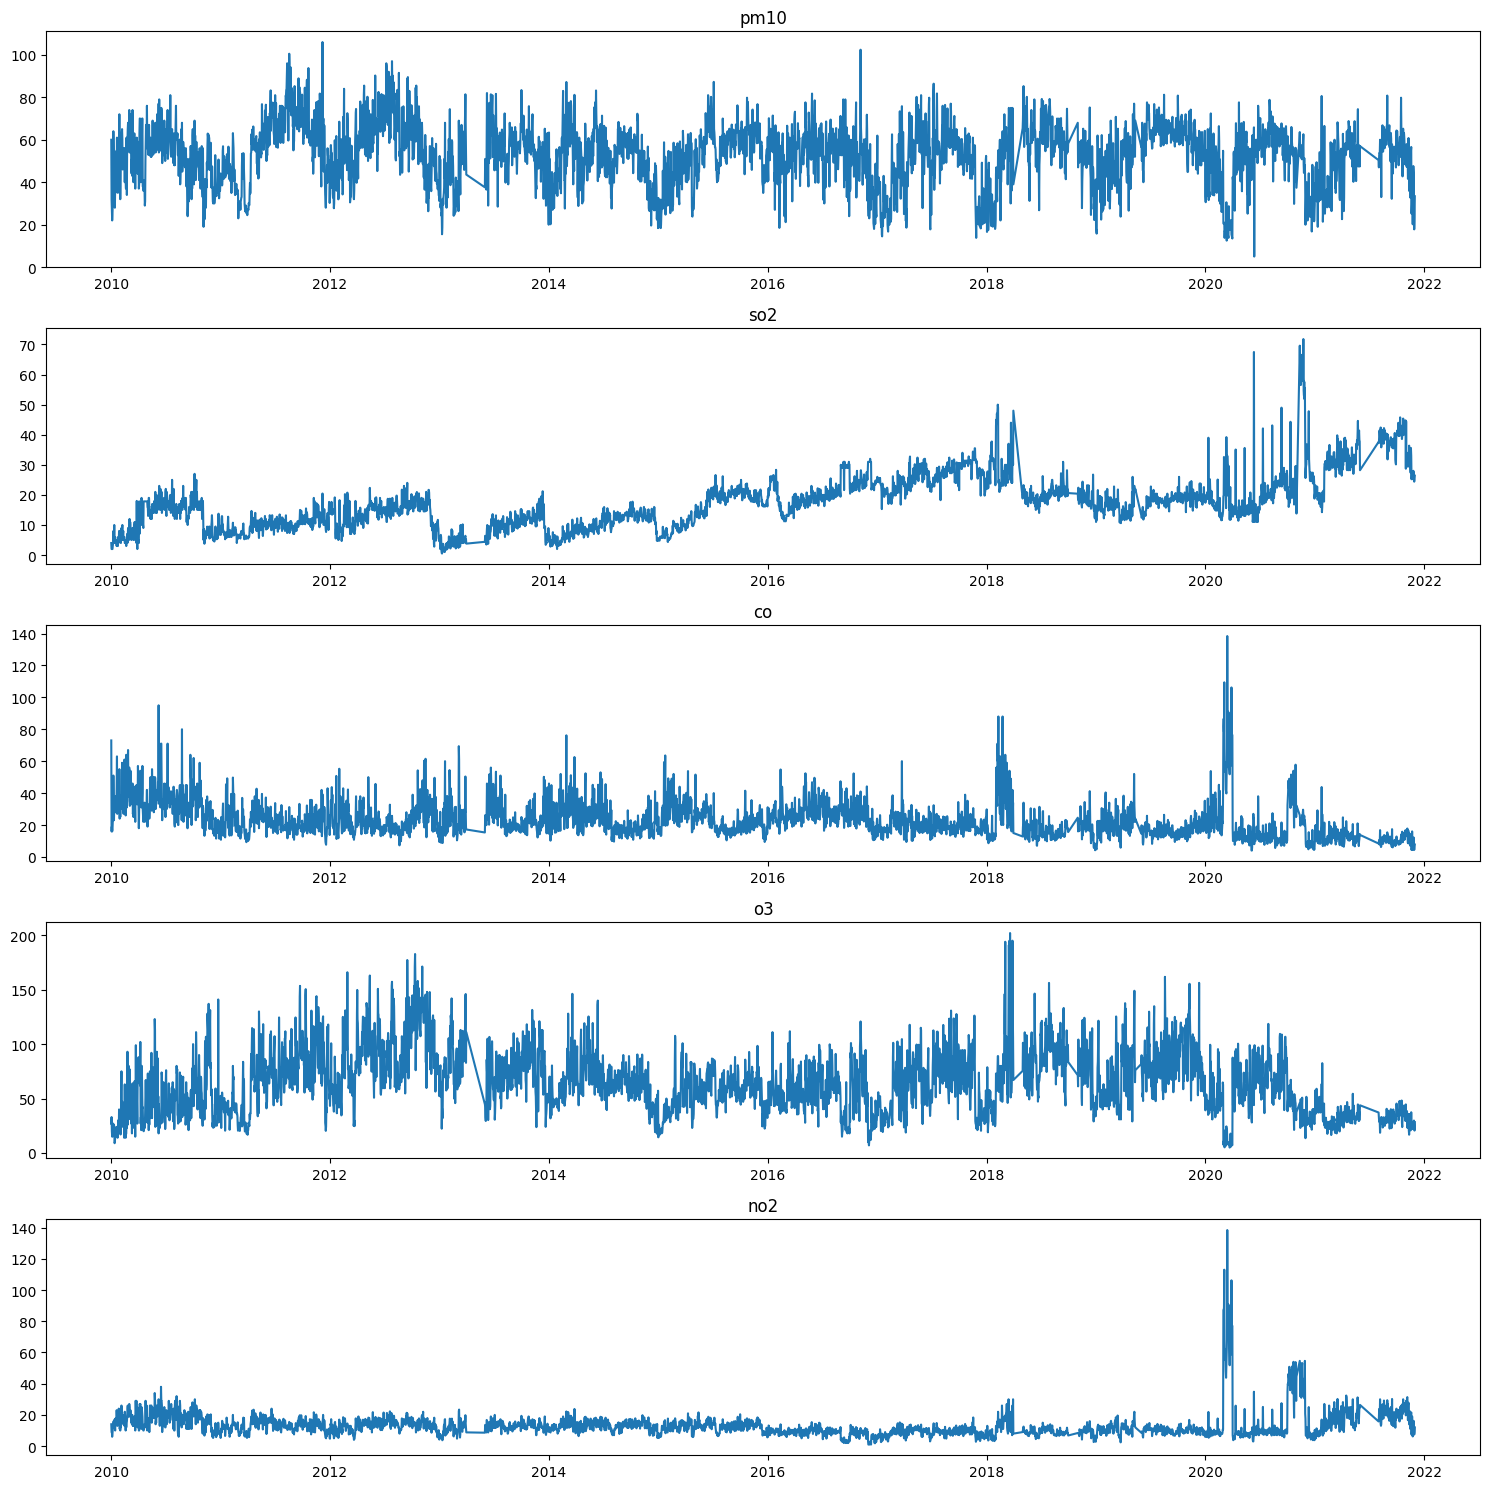

In [154]:
df_grouped=featuring(df_ispu)

In [155]:
df_grouped.reset_index(inplace=True)
df_grouped

,index,tanggal,pm10,so2,co,o3,no2
0,0,2010-01-01,60.0,4.0,73.0,27.000000,14.0
1,1,2010-01-02,32.0,2.0,16.0,33.000000,9.0
2,2,2010-01-03,27.0,2.0,19.0,20.000000,9.0
3,3,2010-01-04,22.0,2.0,16.0,15.000000,6.0
4,4,2010-01-05,25.0,2.0,17.0,15.000000,8.0
...,...,...,...,...,...,...,...
4128,4128,2021-11-26,44.6,27.6,12.2,29.016195,16.2
4129,4129,2021-11-27,30.8,25.6,8.2,29.816195,13.4
4130,4130,2021-11-28,17.8,24.4,4.4,25.800000,7.4
4131,4131,2021-11-29,23.6,25.2,6.6,20.600000,9.0


In [156]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4133 entries, 0 to 4132
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   index    4133 non-null   int64         
 1   tanggal  4133 non-null   datetime64[ns]
 2   pm10     4133 non-null   float64       
 3   so2      4133 non-null   float64       
 4   co       4133 non-null   float64       
 5   o3       4133 non-null   float64       
 6   no2      4133 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 226.2 KB


In [157]:
df_train=df_grouped.copy()


In [158]:
#transform index to dataframe column and call it unique_id, tanggal to ds and co to y
df_train.reset_index(inplace=True)
df_train.rename(columns={'index':'unique_id', 'tanggal':'ds', 'co':'y'}, inplace=True)
df_train.head()

,level_0,unique_id,ds,pm10,so2,y,o3,no2
0,0,0,2010-01-01,60.0,4.0,73.0,27.0,14.0
1,1,1,2010-01-02,32.0,2.0,16.0,33.0,9.0
2,2,2,2010-01-03,27.0,2.0,19.0,20.0,9.0
3,3,3,2010-01-04,22.0,2.0,16.0,15.0,6.0
4,4,4,2010-01-05,25.0,2.0,17.0,15.0,8.0


In [159]:
df_use=df_train[['unique_id', 'ds', 'y']]

In [165]:
df_use.isna().sum()

unique_id    0
ds           0
y            0
dtype: int64

In [160]:
from statsforecast.utils import ConformalIntervals

In [161]:
from statsforecast.models import (
    AutoETS, 
    HistoricAverage, 
    Naive, 
    RandomWalkWithDrift, 
    SeasonalNaive
)

In [162]:
# Create a list of models and instantiation parameters 
intervals = ConformalIntervals(h=24, n_windows=2)

models = [
    SeasonalExponentialSmoothing(season_length=24,alpha=0.1, prediction_intervals=intervals),
    ADIDA(prediction_intervals=intervals),
    ARIMA(order=(24,0,12), season_length=24, prediction_intervals=intervals),
]

sf = StatsForecast(
    df=df_use, 
    models=models, 
    freq='H', 
)

In [163]:
levels = [80, 90] # confidence levels of the prediction intervals 

In [164]:
forecasts = sf.forecast(h=24, level=levels)
forecasts = forecasts.reset_index()
forecasts.head()

ValueError: operands could not be broadcast together with shapes (24,) (0,) 